In [8]:
import pickle
from tensorflow_ver.store_vectors import load_img, vectorized, euclid_dis


from keras.applications.vgg16 import VGG16
from keras.models import Model

vgg16_model = VGG16(weights="imagenet")
extract_model = Model(inputs=vgg16_model.inputs, outputs=vgg16_model.get_layer("fc1").output)

extract_model.summary()

vectors = pickle.load(open("./weights/vectors.pkl", "rb"))
paths = pickle.load(open("./weights/paths.pkl", "rb"))

database = zip(vectors, paths)

query_img_pth = "./assets/anh_test_linh/img1.png"

query_img = load_img(query_img_pth)
query_img_vector = vectorized(query_img, extract_model)


distances = [(euclid_dis(query_img_vector, vector), path) for vector, path in database]




Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [9]:
copy_dist = distances.copy()

In [10]:
copy_dist.sort(key= lambda x : x[0])

In [11]:
top_9 = copy_dist[:9]

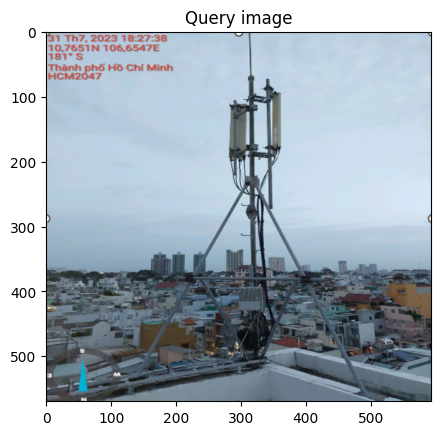

In [12]:
import cv2 as cv
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

img = cv.imread(query_img_pth, cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.title("Query image")
plt.imshow(img)

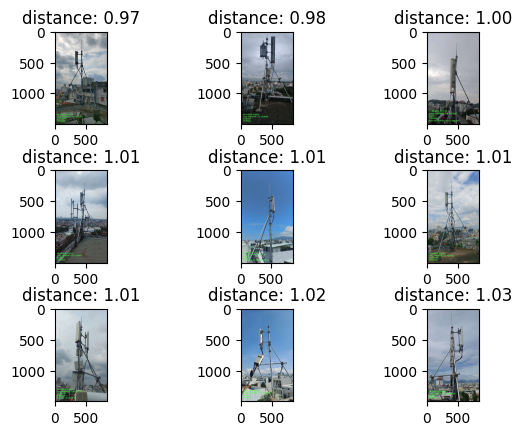

In [13]:
f, axarr = plt.subplots(3, 3)


count = 0
for idx, (distance, path) in enumerate(top_9):
    data_img = cv.imread(path.replace("src/", "./"))
    data_img = cv.cvtColor(data_img, cv.COLOR_BGR2RGB)
    ax = axarr[int(count/3), (idx+3)%3]
    ax.imshow(data_img)
    ax.set_title(f"distance: {distance:.2f}")
    count +=1
    
f.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()